## **Importing the Libraries`**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


## **Read the Dataset**

In [19]:

df = pd.read_csv('patient_data1.csv')


df.rename(columns={'C': 'Gender'}, inplace=True)

df


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


## **Check for Missing Values**

In [20]:
# Step 3: Checking for missing values
print("Missing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64


## **Fix Inconsistencies in 'Stages' Column**

In [21]:

df['Stages'] = df['Stages'].str.upper().str.strip()


df['Stages'] = df['Stages'].replace({
    'HYPERTENSION (STAGE-1)': 'HYPERTENSION STAGE-1',
    'HYPERTENSION (STAGE-2)': 'HYPERTENSION STAGE-2',
    'HYPERTENSION (STAGE-3)': 'HYPERTENSION STAGE-3',
    'PREHYPERTENSION': 'PRE-HYPERTENSION',
    'NORMAL': 'NORMAL'
})

print("Unique Stage values after cleaning:")
print(df['Stages'].unique())


Unique Stage values after cleaning:
['HYPERTENSION STAGE-1' 'HYPERTENSION STAGE-2' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (STAGE-2).' 'HYPERTENSIVE CRISI' 'NORMAL']


## **Handling Categorical Values (Encoding)**

In [22]:

label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Save encoder for decoding later

print("Dataset after encoding:")
df.head()


Dataset after encoding:


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,1,1,1,3,0,1
1,0,0,1,0,0,0,0,0,1,1,1,3,0,1
2,1,1,1,0,0,0,0,0,1,1,1,3,0,1
3,0,1,1,0,0,0,0,0,1,1,1,3,0,1
4,1,2,1,0,0,0,0,0,1,1,1,3,0,1


## **Exploratory Data Analysis (EDA)**


# **1: Descriptive Statistical Analysis**

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1825 non-null   int64
 1   Age              1825 non-null   int64
 2   History          1825 non-null   int64
 3   Patient          1825 non-null   int64
 4   TakeMedication   1825 non-null   int64
 5   Severity         1825 non-null   int64
 6   BreathShortness  1825 non-null   int64
 7   VisualChanges    1825 non-null   int64
 8   NoseBleeding     1825 non-null   int64
 9   Whendiagnoused   1825 non-null   int64
 10  Systolic         1825 non-null   int64
 11  Diastolic        1825 non-null   int64
 12  ControlledDiet   1825 non-null   int64
 13  Stages           1825 non-null   int64
dtypes: int64(14)
memory usage: 199.7 KB


## **2: Visual Analysis**

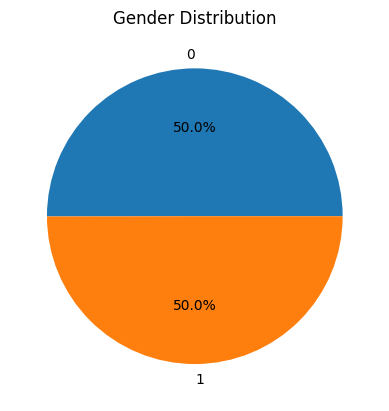

<Figure size 800x400 with 0 Axes>

In [24]:
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.figure(figsize=(8,4))
plt.show()

## **3: Univariate Analysis**


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17888\2501488843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='Reds')


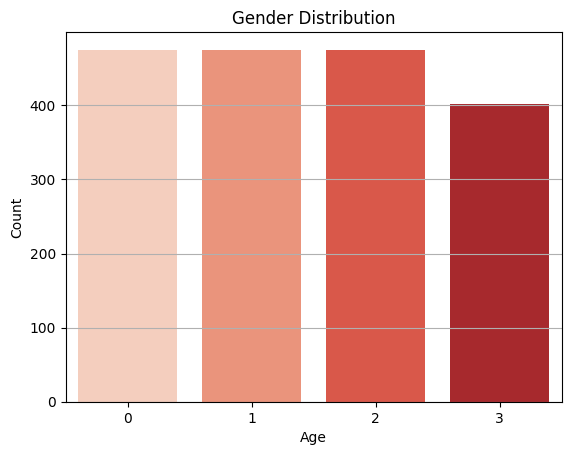

In [25]:
sns.countplot(x='Age', data=df, palette='Reds')
plt.title('Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17888\2848052478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stages', data=df, palette='Reds' ,order=['NORMAL','HYPERTENSION (Stage-1)','HYPERTENSION (Stage-2)','HYPERTENSIVE CRISIS'])


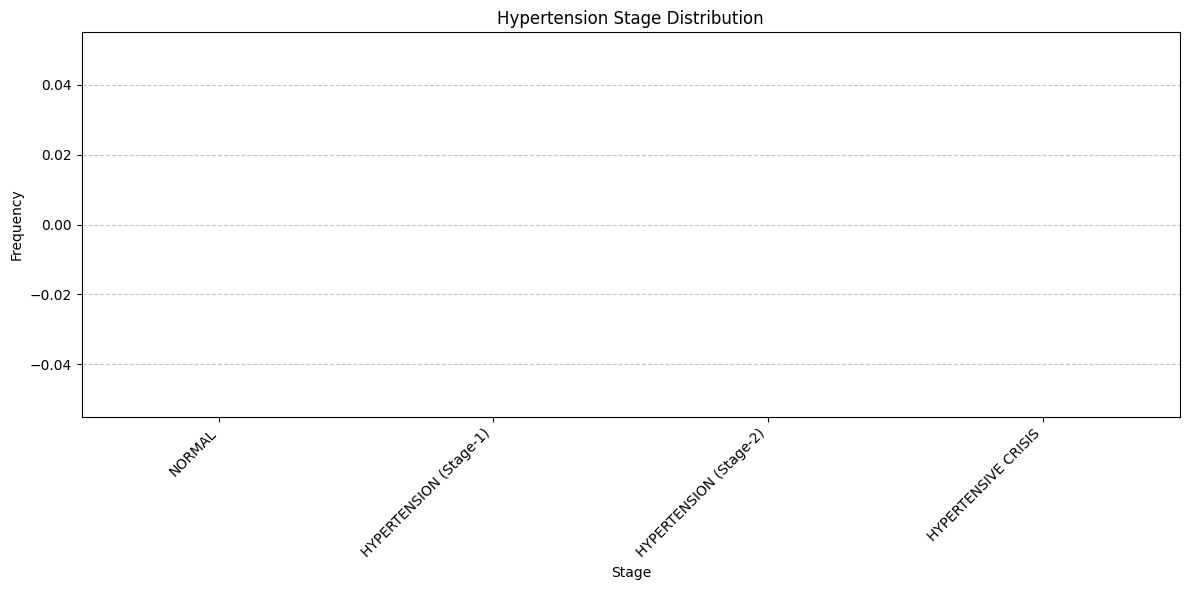

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stages', data=df, palette='Reds' ,order=['NORMAL','HYPERTENSION (Stage-1)','HYPERTENSION (Stage-2)','HYPERTENSIVE CRISIS'])

plt.title('Hypertension Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **4: Bivariate Analysis**

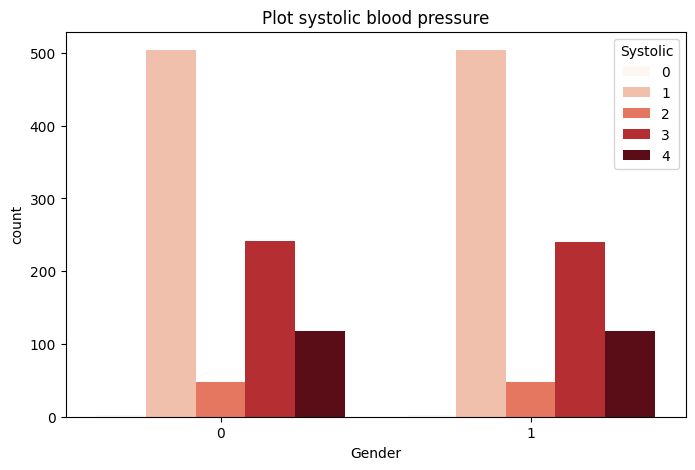

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Systolic', data=df, palette='Reds')
plt.title('Plot systolic blood pressure')
plt.show()


## **6. Splitting Data into Train & Test**

In [28]:
X = df.drop('Stages',axis=1,inplace=False)
y = df['Stages']


In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
algorithms = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
}

In [31]:
from sklearn.metrics import accuracy_score

results = {}

for name, model in algorithms.items():
    model.fit(X_train, y_train)                         # Train
    y_pred = model.predict(X_test)                      # Predict
    acc = accuracy_score(y_test, y_pred)                # Accuracy
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression: Accuracy = 0.9863
Decision Tree: Accuracy = 0.9973
Random Forest: Accuracy = 1.0000
Support Vector Machine: Accuracy = 1.0000


In [32]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print(f"CV Average: {cv_scores.mean():.4f}")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV Average: 0.9986


In [33]:
joblib.dump(model, "model.joblib")

['model.joblib']

In [34]:
saved_model = joblib.load("model.joblib")
saved_model

SVC(probability=True)